# Analysis notebook: `SU2020b_CRY_offspill-LH_as`  

## Define analysis name

In [1]:
ana_label = "SU2020b_CRY_offspill-LH_as"

## Preamble

In [2]:
import sys
sys.path.append("..")
from preamble import *

## Load data

In [3]:
!ls ../../../output/results/SU2020b_CRY_offspill-LH_as

analysis.csv  events.parquet  info.txt	   SU2020b_CRY_offspill-LH_as.log
cut_flow.csv  hists.h5	      results.pkl  SU2020b_CRY_offspill-LH_as.yaml


In [4]:
loader = Load(
    in_path = f"../../../output/results/{ana_label}"
)

[Load] ✅ Initialised with out_path=../../../output/results/SU2020b_CRY_offspill-LH_as


In [5]:
results = loader.load_pkl() 
results_from_persistent = loader.load_all() # Persistent backup 

[Load] ✅ Successfully loaded results from ../../../output/results/SU2020b_CRY_offspill-LH_as/results.pkl
[Load] ✅ Loaded cut stats from ../../../output/results/SU2020b_CRY_offspill-LH_as/cut_flow.csv
[Load] ✅ Loaded histograms from ../../../output/results/SU2020b_CRY_offspill-LH_as/hists.h5
[Load] ✅ Loaded analysis info from ../../../output/results/SU2020b_CRY_offspill-LH_as/analysis.csv
[Load] ✅ Successfully loaded ak.Array from ../../../output/results/SU2020b_CRY_offspill-LH_as/events.parquet
[Load] ✅ Loaded info from ../../../output/results/SU2020b_CRY_offspill-LH_as/info.txt


## Analyse results

### Cut flow

In [6]:
display(results["cut_flow"].round(3))

,Cut,Group,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,NaN,5754129,100.000,100.000,No selection applied
1,has_trk_front,Preselect,5732419,99.623,99.623,Tracks intersect tracker entrance
2,is_reco_electron,Preselect,5246599,91.180,91.525,Electron track fits
3,is_downstream,Preselect,3256493,56.594,62.069,Downstream tracks (p_z > 0 at tracker entrance)
4,one_reco_electron,Preselect,2109815,36.666,64.788,One reco electron / event
5,is_truth_electron,Preselect,845921,14.701,40.095,Track parents are electrons (truth PID)
6,good_trkqual,Tracker,645533,11.219,76.311,Track fit quality > 0.2
7,has_hits,Tracker,640205,11.126,99.175,>20 active tracker hits
8,within_t0err,Tracker,604722,10.509,94.458,Track fit t0 uncertainty (t0err < 0.9 ns)
9,within_d0,Tracker,77177,1.341,12.762,Distance of closest approach (d_0 < 100 mm)


### Efficiency & rates

In [7]:
display(results["analysis"].round(3))

,Type,k,N,Eff [%],Eff Err$-$ [%],Eff Err$+$ [%],Rate 1batch [$\text{day}^{-1}$],Rate 1batch Err$-$ [$\text{day}^{-1}$],Rate 1batch Err$+$ [$\text{day}^{-1}$],Rate 2batch [$\text{day}^{-1}$],Rate 2batch Err$-$ [$\text{day}^{-1}$],Rate 2batch Err$+$ [$\text{day}^{-1}$]
0,CE-like (wide),26738,41100000000,0.000,-0.000,0.000,147.346,-0.896,0.902,163.863,-0.997,1.003
1,CE-like (ext),4279,41100000000,0.000,-0.000,0.000,23.580,-0.358,0.364,26.224,-0.399,0.405
2,CE-like (sig),482,41100000000,0.000,-0.000,0.000,2.656,-0.120,0.126,2.954,-0.134,0.140
3,No veto (wide),12,26738,99.955,-0.015,0.011,0.066,-0.019,0.025,0.074,-0.021,0.028
4,No veto (ext),1,4279,99.977,-0.038,0.014,0.006,-0.005,0.013,0.006,-0.005,0.014
5,No veto (sig),0,482,100.000,-0.207,0.000,0.000,0.000,0.006,0.000,0.000,0.007


### Histograms

In [8]:
# Setup draw for this cutset
on_spill = "offspill" not in ana_label
draw = Draw(cutset_name=ana_label.split('_')[0], on_spill=on_spill)
# Define image directory
img_dir = f"../../../output/images/{ana_label}"
os.makedirs(img_dir, exist_ok=True)

[Plot] ⭐️ Initialised


[Plot] ✅ 	Wrote ../../../output/images/SU2020b_CRY_offspill-LH_as/h1o_1x3_mom_windows.png


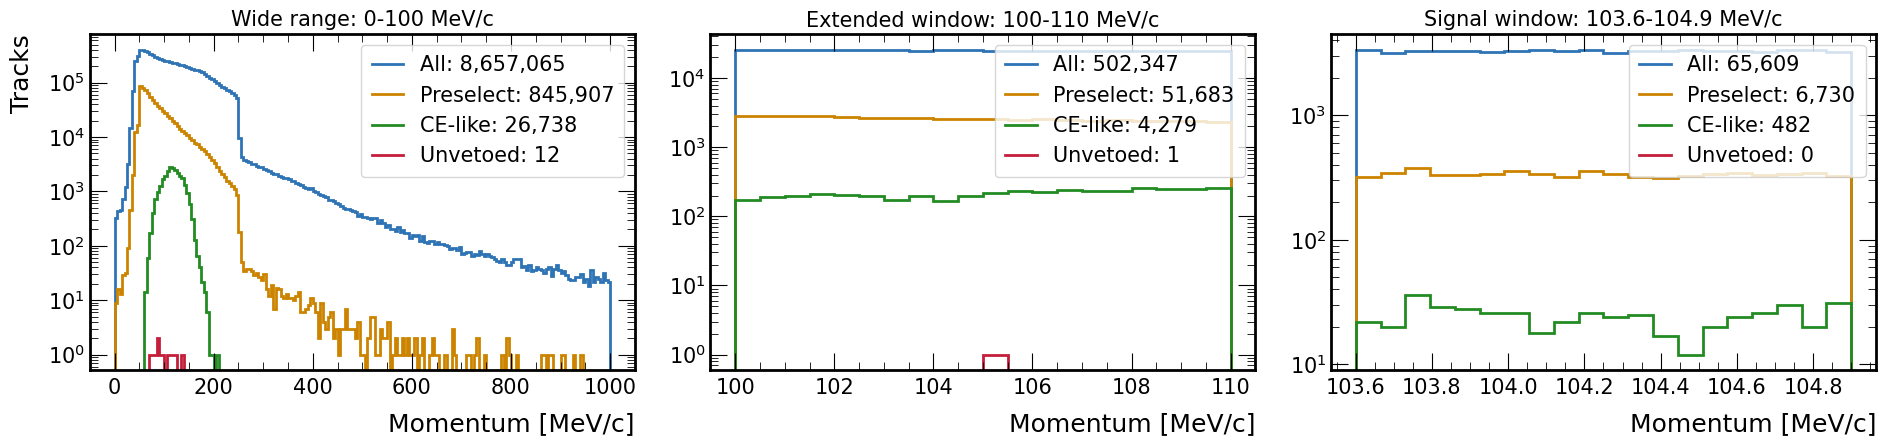

In [9]:
draw.plot_mom_windows(results["hists"], out_path=f"{img_dir}/h1o_1x3_mom_windows.png") 

[Plot] ✅ 	Wrote ../../../output/images/SU2020b_CRY_offspill-LH_as/h1o_3x3_summary.png


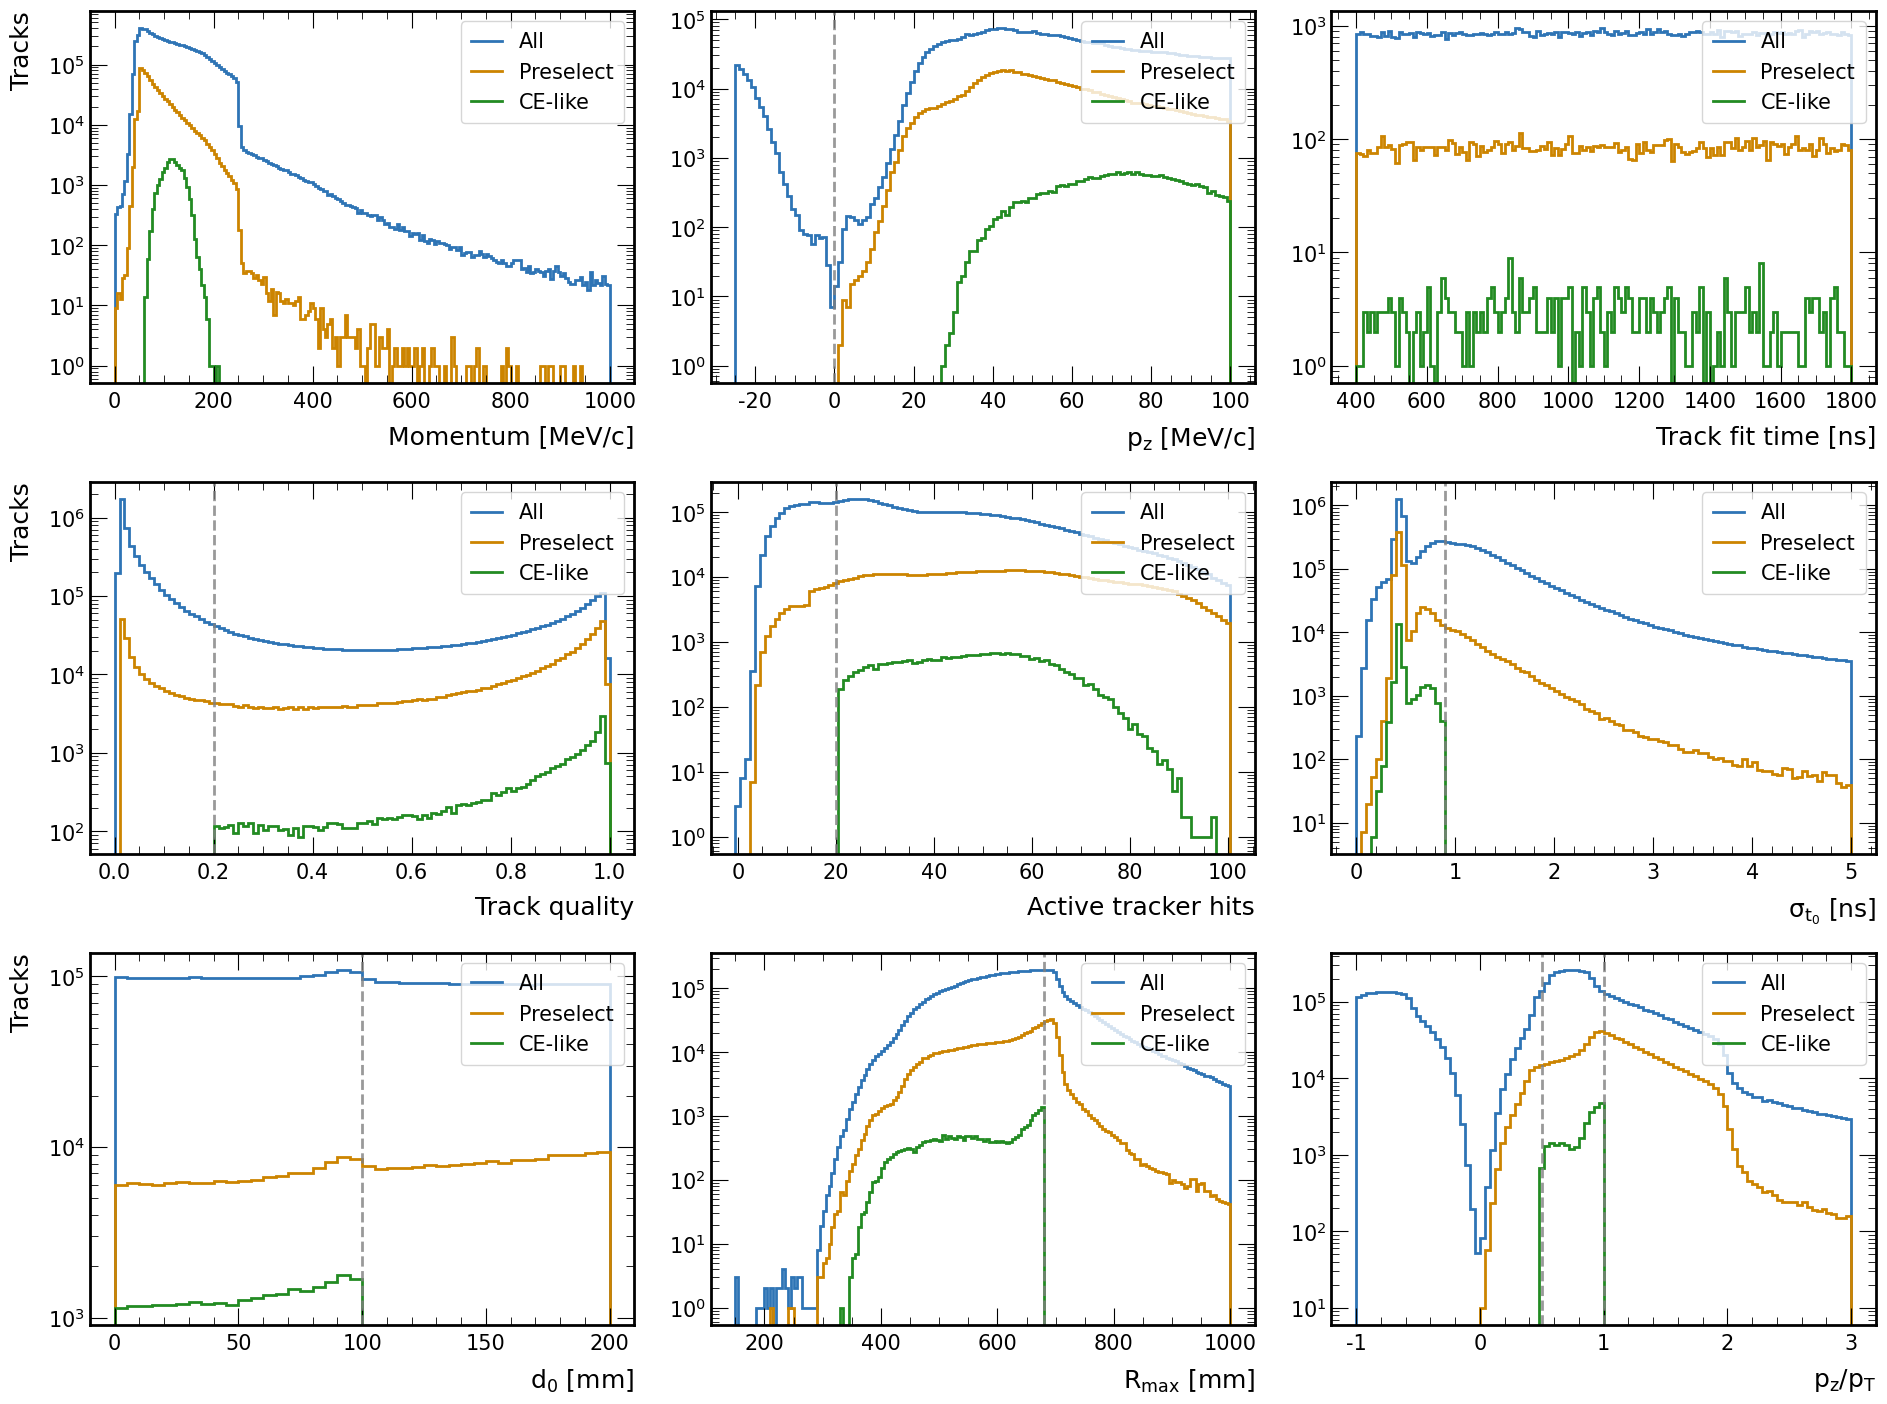

In [10]:
draw.plot_summary(results["hists"], out_path=f"{img_dir}/h1o_3x3_summary.png")

[Plot] ✅ 	Wrote ../../../output/images/SU2020b_CRY_offspill-LH_as/h1o_crv_z.png


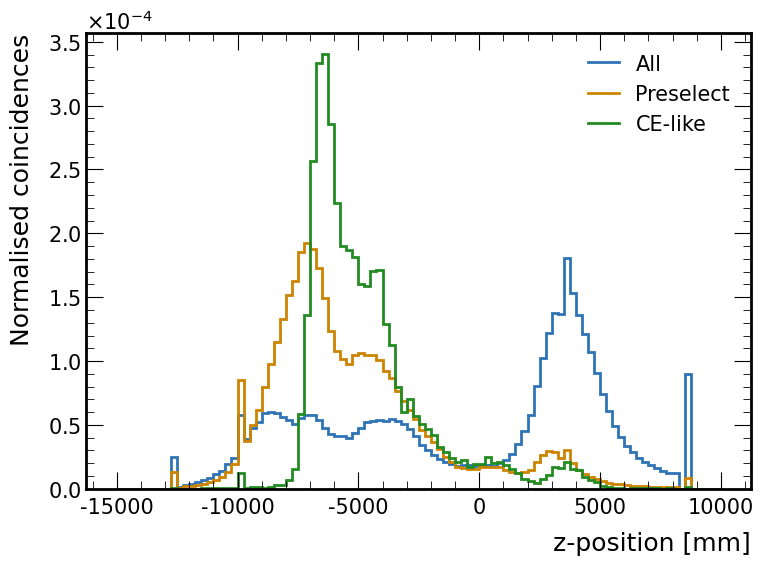

In [11]:
draw.plot_crv_z(results["hists"], out_path=f"{img_dir}/h1o_crv_z.png") 

### Background event info

In [12]:
print(results["event_info"])

  Index:            8
  Subrun:           [3113]
  Event:            [86303]
  File:             nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.001202_00000034.root
  Track time [ns]:  31513.982908
  Coinc time [ns]:  31359.072266
  dt [ns]:          154.910643
----------------------------------------
  Index:            48
  Subrun:           [4846]
  Event:            [283585]
  File:             nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.001202_00000075.root
  Track time [ns]:  59076.573926
  Coinc time [ns]:  None
  dt [ns]:          N/A
----------------------------------------
  Index:            143
  Subrun:           [10372]
  Event:            [47517]
  File:             nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.001202_00008885.root
  Track time [ns]:  19695.169137
  Coinc time [ns]:  None
  dt [ns]:          N/A
----------------------------------------
  Index:            197

In [13]:
if results["events"] is not None:
    from pyutils.pyprint import Print
    printer = Print()
    printer.print_n_events(results["events"], n_events = len(results["events"]))

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[pyprint] ⭐️ Printing 12 event(s)...

-------------------------------------------------------------------------------------
evt.run: 1202
evt.subrun: 3113
evt.event: 86303
crv.crvcoincs.time: [3.14e+04]
crv.crvcoincs.nHits: [17]
crv.crvcoincs.pos.fCoordinates.fZ: [2.55e+03]
at_trk_front: [[False, False, False, True, False, False], [False, ...], ..., [False, True]]
has_trk_front: [True, True, True, True]
is_reco_electron: [True, False, False, False]
is_downstream: [True, True, True, False]
one_reco_electron: [True, True, True, True]
one_reco_electron_per_event: True
is_truth_electron: [True, True, True, False]
good_trkqual: [True, True, False, False]
has_hits: [True, True, False, False]
within_t0err: [True, True, False, False]
within_d0: [True, True, False, False]
pitch_angle: [[0.343, 0.341, 0.486, 0.525, 0.546, 0.566], [...], ..., [-0.193, -0.163]]
within_pitch_angle_lo: [True, True, False, False]
within_pitch_angle